# Parallaxes and proper motions of high-mass star forming regions data and spiral arms fitting
http://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/783/130/table1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord

In [2]:
from galpy.potential import evaluatePotentials, evaluateDensities, plotPotentials, MWPotential2014, SpiralArmsPotential
from galpy.util import bovy_coords

//anaconda/envs/galpy/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



In [3]:
tbl = ascii.read('../data/asu.tsv', data_start=2)
tbl

_Glon,_Glat,Name,Alias,RAJ2000,DEJ2000,plx,e_plx,pmX,e_pmX,pmY,e_pmY,VLSR,e_VLSR,Arm,Ref
float64,float64,str13,str15,str11,str11,float64,float64,float64,float64,float64,float64,int64,int64,str3,str8
348.7037,-1.0436,G348.70-01.04,,17 20 04.04,-38 58 30.9,0.296,0.026,-0.73,0.19,-2.83,0.54,-7,6,...,1
351.4449,0.6597,G351.44+00.65,NGC 6334,17 20 54.60,-35 45 08.6,0.744,0.074,0.4,0.51,-2.24,0.64,-8,3,Sgr,2
0.6724,-0.0311,G000.67-00.03,Sgr B2,17 47 20.00,-28 22 40.0,0.129,0.012,-0.78,0.4,-4.26,0.4,62,5,...,3
5.8843,-0.3925,G005.88-00.39,,18 00 30.31,-24 04 04.5,0.334,0.02,0.18,0.34,-2.26,0.34,9,3,Sct,4
9.6212,0.1958,G009.62+00.19,,18 06 14.66,-20 31 31.7,0.194,0.023,-0.58,0.13,-2.49,0.29,2,3,4-k,5
10.4723,0.0272,G010.47+00.02,,18 08 38.23,-19 51 50.3,0.117,0.008,-3.86,0.19,-6.4,0.14,69,5,Con,7
10.6235,-0.3831,G010.62-00.38,W 31,18 10 28.55,-19 55 48.6,0.202,0.019,-0.37,0.5,-0.6,0.25,-3,5,3-k,7
11.4974,-1.4853,G011.49-01.48,,18 16 22.13,-19 41 27.2,0.8,0.033,1.42,0.52,-0.6,0.65,11,3,Sgr,2
11.9177,-0.6131,G011.91-00.61,,18 13 58.12,-18 54 20.3,0.297,0.031,0.66,0.28,-1.36,0.41,37,5,Sct,4


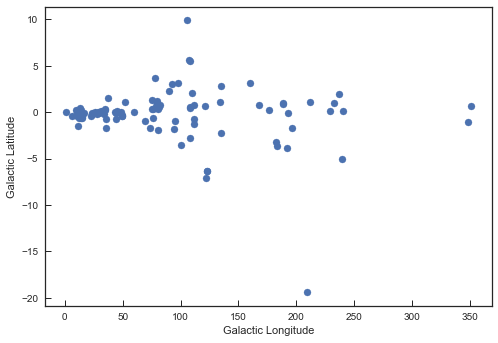

In [4]:
from astropy.coordinates import Longitude, Latitude

glon = Longitude(tbl['_Glon'] * u.deg)
glat = Latitude(tbl['_Glat'] * u.deg)
plt.scatter(glon, glat)
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.show()

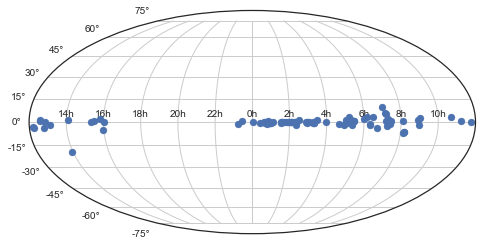

In [5]:
glon = glon.wrap_at(180*u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(glon.radian, glat.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
plt.show()

In [6]:
np.unique(tbl['Arm'])

...
3-k
4-k
Con
Loc
Out
Per
Sct
Sgr


In [7]:
arm_ids = np.unique(tbl['Arm'])
listof_hmsfr = []
listof_dist_err = []

for k in range(len(arm_ids)):
    selector = (tbl['Arm'] == arm_ids[k])
    listof_hmsfr.append(SkyCoord(ra=tbl['RAJ2000'][selector], dec=tbl['DEJ2000'][selector], distance=1/tbl['plx'][selector]
             ,unit=['hourangle', 'deg', 'kpc'], equinox='J2000.0'))
    listof_dist_err.append((tbl['e_plx'][selector] / tbl['plx'][selector] / tbl['plx'][selector]) * u.kpc)

In [8]:
listof_hmsfr

[<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
     [( 260.01683333, -38.97525   ,  3.37837838),
      ( 266.83333333, -28.37777778,  7.75193798),
      ( 278.71495833,  -8.30594444,  3.19488818),
      ( 283.38566667,   0.52752778,  6.53594771),
      (  75.41766667,  47.12194444,  4.09836066),
      ( 103.18883333,   1.67308333,  4.38596491)]>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
     [( 272.61895833, -19.93016667,  4.95049505),
      ( 273.00766667, -18.53216667,  9.43396226)]>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
     [( 271.56108333, -20.52547222,  5.15463918),
      ( 278.6675    ,  -9.01027778,  4.58715596),
      ( 278.66329167,  -8.52372222,  5.88235294),
      ( 278.8015    ,  -8.29430556,  6.21118012)]>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
     [( 272.15929167, -19.86397222,  8.54700855)]>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
     [( 295.796875  ,  23.73425   ,  2.15982721),
  

In [9]:
np.array(listof_dist_err[6])

array([ 0.86419753,  0.57810151,  0.38265306,  0.3569304 ,  0.11809024,
        0.53393337,  0.10473288,  0.19570213,  0.5304784 ,  0.18510806,
        0.11897763,  0.09451796,  0.23804801,  0.12412478,  0.03814697,
        0.09966641,  0.04001231,  0.41867196,  0.02648118,  0.09182736,
        0.0684612 ,  0.28664442,  0.20269357,  0.46724813])

In [10]:
# Convert to galactocentric coordinates
for k in range(len(listof_hmsfr)):
    listof_hmsfr[k] = listof_hmsfr[k].transform_to(coord.Galactocentric(galcen_distance=8.34*u.kpc))

In [46]:
listof_hmsfr

[<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     ( 266.4051, -28.936175)>, galcen_distance=8.34 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
     [( -5.02779267, -0.66165895, -0.04524993),
      ( -0.58860737,  0.09096454, -0.00228943),
      ( -5.41359222,  1.28196299,  0.01042681),
      ( -2.89879087,  3.62083306, -0.01658095),
      (-12.18811377,  1.38979768,  0.26513126),
      (-12.07497306, -2.29732603,  0.11990349)]>,
 <SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     ( 266.4051, -28.936175)>, galcen_distance=8.34 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
     [(-3.47455353,  0.91261782, -0.02184583),
      ( 0.88691672,  1.96551061, -0.00801949)]>,
 <SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     ( 266.4051, -28.936175)>, galcen_distance=8.34 kpc, galcen_v_sun=( 11.1,  232.24,  

In [11]:
def plt_hmsfr(fig, ax, extent):
    markers = ['^', 'o', 'd', 'X', '*', 'p', 'h', 's', 'H']

    for k in range(len(listof_hmsfr)):
        ax.scatter(listof_hmsfr[k].x, -listof_hmsfr[k].y,
                    marker=markers[k], label=arm_ids[k])
        ax.errorbar(listof_hmsfr[k].x.value, -listof_hmsfr[k].y.value, yerr=listof_dist_err[k].value, fmt=None)
        
    ax.scatter(0, 0, marker=(6, 2, 0), color='r', s=400)  # center of Milky Way
    ax.scatter(-8.34, 0, marker='o', color='y', s=200)  # the sun

    ax.set_xlim((extent[0], extent[1]))
    ax.set_ylim((extent[2], extent[3]))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    #ax.grid(b=True, which='major', color='k', linestyle='--')
    plt.legend()
    plt.xlabel('x (kpc)')
    plt.ylabel('y (kpc)')

//anaconda/envs/galpy/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)

//anaconda/envs/galpy/lib/python2.7/site-packages/matplotlib/axes/_base.py:1298: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':

//anaconda/envs/galpy/lib/python2.7/site-packages/matplotlib/axes/_base.py:1303: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):



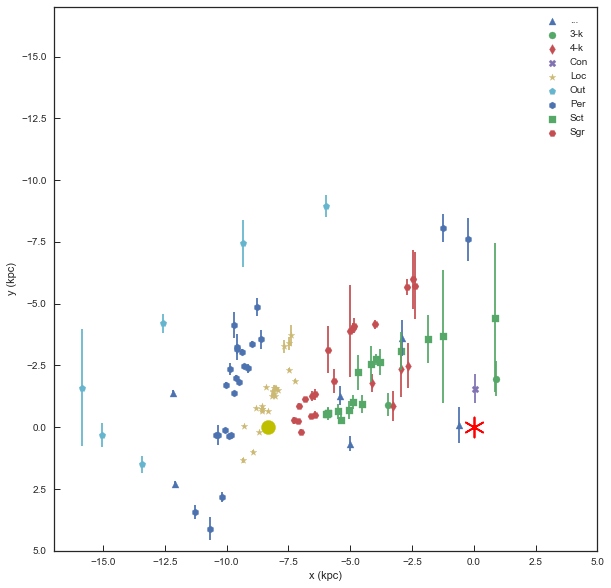

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
extent = [-17, 5, -17, 5]
plt_hmsfr(fig, ax, extent)
plt.gca().invert_yaxis()
plt.show()

In [13]:
def plt_spirals(fig, ax, pot, x, y, extent, cmap='Greys', plotlog=False):
    n = len(x)
    X, Y = np.meshgrid(x, y)
    potxy = np.zeros((n, n))

    for ii in range(n):
        for jj in range(n):
            R, phi, z = bovy_coords.rect_to_cyl(x[ii].value, y[jj].value, 0)
            potxy[ii, jj] = evaluateDensities(pot, R*u.kpc, z*u.kpc, phi)

    if plotlog:
        c = ax.contourf(np.log(potxy.T), origin='lower', extent=extent, ncontours=21, cmap=cmap, alpha=0.3)
    else:
        c = ax.contourf(potxy.T, origin='lower', extent=extent, ncontours=21, cmap=cmap, alpha=0.3)
        
    ax.set_xlabel('x (kpc)')
    ax.set_ylabel('y (kpc)')
    ax.set_title('Density')
   # plt.colorbar(c)

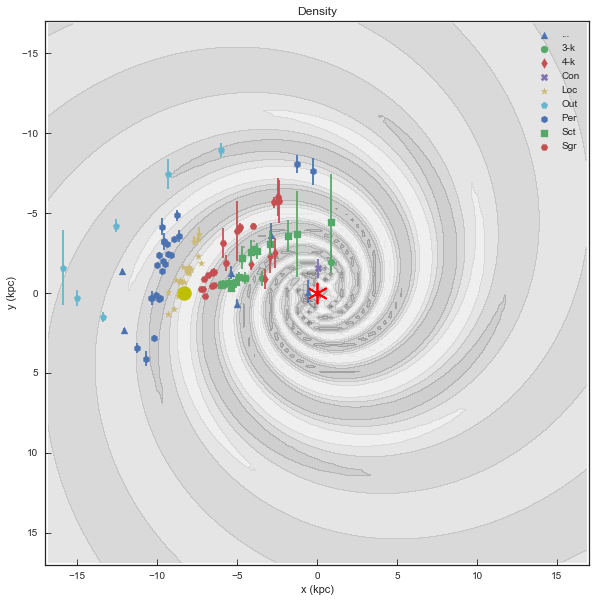

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

sp = SpiralArmsPotential(N=5, alpha=18*u.deg, Rs=9*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)
pot = sp

x = np.linspace(-17, 17, 100) * u.kpc
y = np.linspace(-17, 17, 100) * u.kpc
extent = [-17, 17, -17, 17]
plt_spirals(fig, ax, pot, x, y, extent)
plt_hmsfr(fig, ax, extent)
plt.gca().invert_yaxis()
plt.show()

In [15]:
def plt_hmsfr_and_spirals(pot, cmap):
    fig, ax = plt.subplots(figsize=(10,10))

    x = np.linspace(-17, 17, 100) * u.kpc
    y = np.linspace(-17, 17, 100) * u.kpc

    extent = [-17, 17, -17, 17]

    plt_spirals(fig, ax, pot, x, y, extent, cmap)

    plt_hmsfr(fig, ax, extent)

    plt.gca().invert_yaxis()
    plt.show()

In [16]:
scutum = SpiralArmsPotential(amp=1, N=2, alpha=19.8*u.deg, phi_ref=(27.6)*u.deg, r_ref=5.0*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
sagittarius = SpiralArmsPotential(amp=1, N=2, alpha=6.9*u.deg, phi_ref=(25.6)*u.deg, r_ref=6.6*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
local = SpiralArmsPotential(amp=0.5, N=2, alpha=12.8*u.deg, phi_ref=(8.9)*u.deg, r_ref=8.4*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
perseus = SpiralArmsPotential(amp=1, N=2, alpha=9.4*u.deg, phi_ref=(14.2)*u.deg, r_ref=9.9*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
outer = SpiralArmsPotential(amp=1, N=2, alpha=13.8*u.deg, phi_ref=(18.6)*u.deg, r_ref=13.0*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])

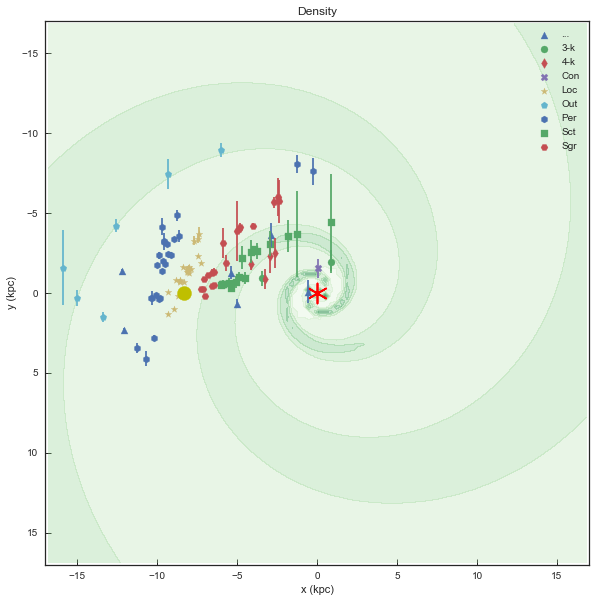

In [17]:
plt_hmsfr_and_spirals(scutum, 'Greens')

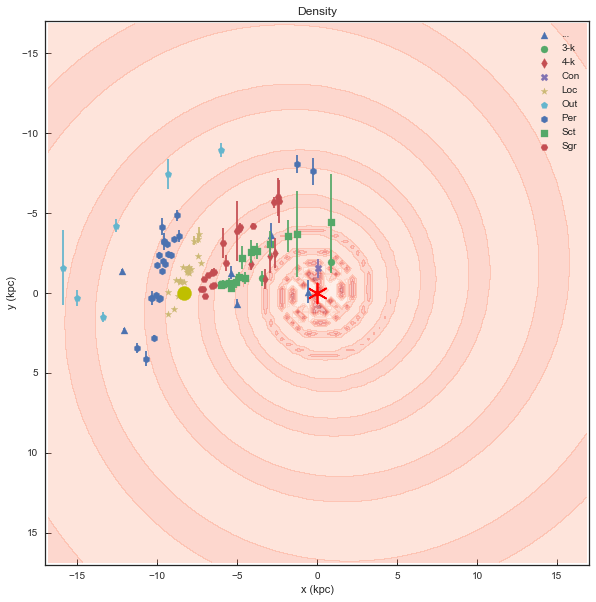

In [18]:
plt_hmsfr_and_spirals(sagittarius, 'Reds')

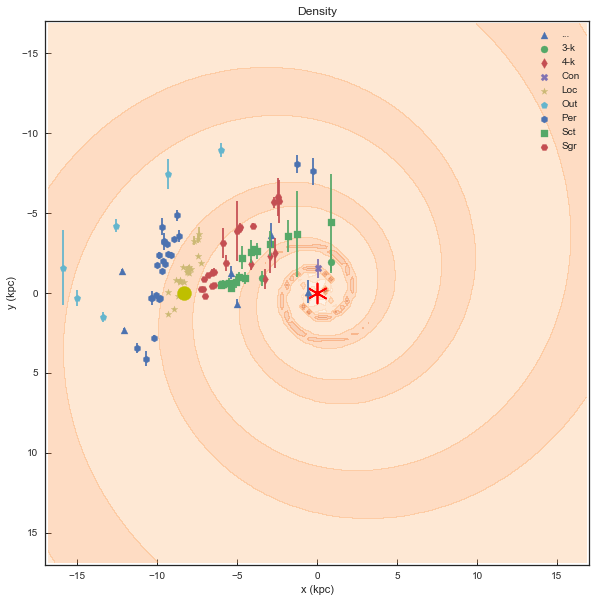

In [19]:
plt_hmsfr_and_spirals(local, 'Oranges')

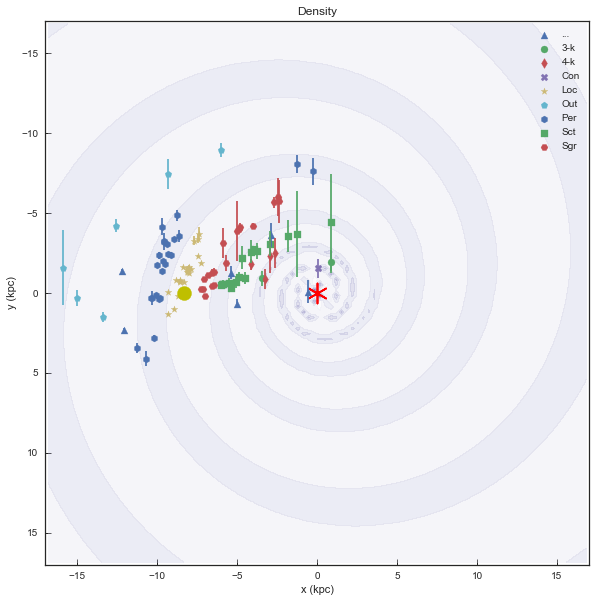

In [20]:
plt_hmsfr_and_spirals(perseus, 'Purples')

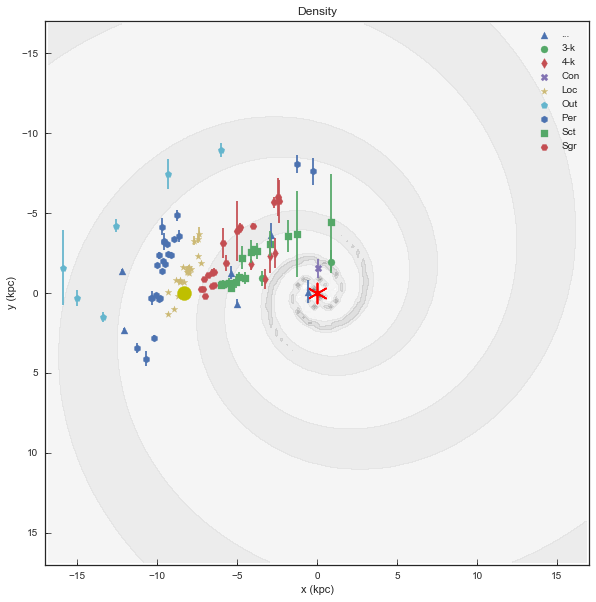

In [21]:
plt_hmsfr_and_spirals(outer, 'Greys')

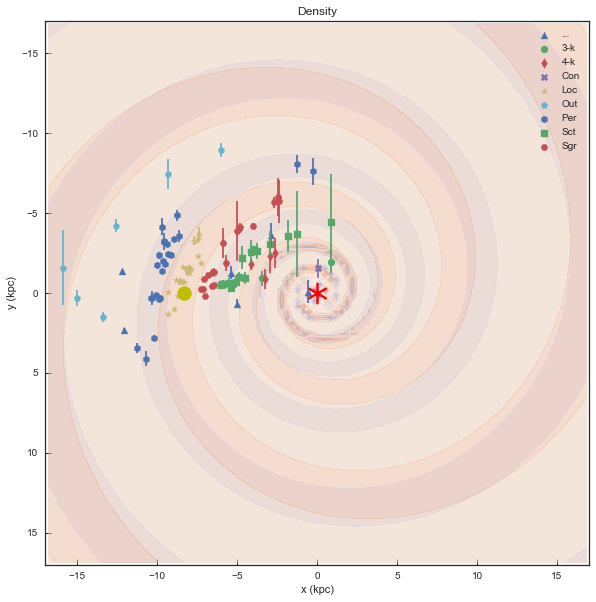

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.linspace(-17, 17, 100) * u.kpc
y = np.linspace(-17, 17, 100) * u.kpc

extent = [-17, 17, -17, 17]

pot = [
        scutum,
        sagittarius,
        local,
        perseus,
        outer
      ]

plt_spirals(fig, ax, local, x, y, extent, 'Oranges')
plt_spirals(fig, ax, perseus, x, y, extent, 'Purples')


plt_hmsfr(fig, ax, extent)

plt.gca().invert_yaxis()
plt.show()

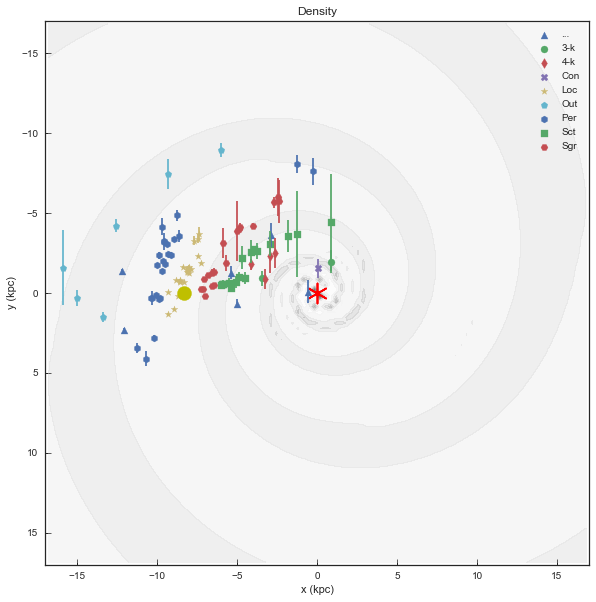

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.linspace(-17, 17, 100) * u.kpc
y = np.linspace(-17, 17, 100) * u.kpc

extent = [-17, 17, -17, 17]

pot = [
        scutum,
        sagittarius,
        local,
        perseus,
        outer
      ]

plt_spirals(fig, ax, pot, x, y, extent)

plt_hmsfr(fig, ax, extent)

plt.gca().invert_yaxis()
plt.show()

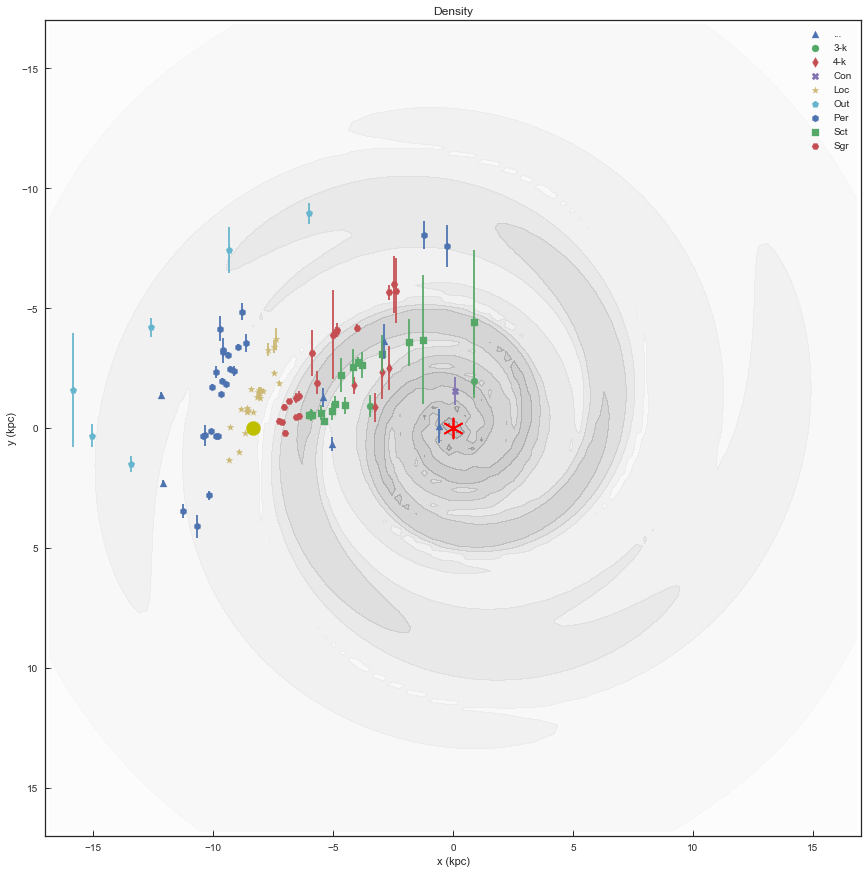

In [24]:
from galpy.potential import MWPotential2014

fig, ax = plt.subplots(figsize=(15,15))

x = np.linspace(-17, 17, 100) * u.kpc
y = np.linspace(-17, 17, 100) * u.kpc

extent = [-17, 17, -17, 17]

pot = MWPotential2014 + \
    [
        scutum,
        sagittarius,
        local,
        perseus,
        outer
      ]

plt_spirals(fig, ax, pot, x, y, extent, plotlog=True)

plt_hmsfr(fig, ax, extent)

plt.gca().invert_yaxis()
plt.show()

In [25]:
flat_listof_hmsfr = [item for sublist in listof_hmsfr for item in sublist]
flat_listof_hmsfr

[<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     ( 266.4051, -28.936175)>, galcen_distance=8.34 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
     (-5.02779267, -0.66165895, -0.04524993)>,
 <SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     ( 266.4051, -28.936175)>, galcen_distance=8.34 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
     (-0.58860737,  0.09096454, -0.00228943)>,
 <SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     ( 266.4051, -28.936175)>, galcen_distance=8.34 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
     (-5.41359222,  1.28196299,  0.01042681)>,
 <SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
     ( 266.4051, -28.936175)>, galcen_distance=8.34 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=

In [26]:
def goodness_of_fit(args):
    sp = SpiralArmsPotential(N=args[0], alpha=args[1]*u.deg, phi_ref=args[2]*u.deg)
    
    ssf = 0
    for hmsfr in flat_listof_hmsfr:
        R, phi, z = bovy_coords.rect_to_cyl(hmsfr.x.value, -hmsfr.y.value, hmsfr.z.value)
        
        max_dens = 0
        min_dens = 0
        
        for p in np.linspace(0, 2*np.pi / args[0], 100):
            dens = evaluateDensities(sp, R, z, p)
            if dens > max_dens:
                max_dens = dens
            if dens < min_dens:
                min_dens = dens
                
        dens = evaluateDensities(sp, R, z, phi)
        
        ssf = ssf - np.log(abs(dens - min_dens) / (max_dens - min_dens))
        
    return ssf
        

In [27]:
goodness_of_fit([2, 9.4, 14.2])

139.56429712029623

In [28]:
scutum = SpiralArmsPotential(amp=1, N=2, alpha=19.8*u.deg, phi_ref=(27.6)*u.deg, r_ref=5.0*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
sagittarius = SpiralArmsPotential(amp=1, N=2, alpha=6.9*u.deg, phi_ref=(25.6)*u.deg, r_ref=6.6*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
local = SpiralArmsPotential(amp=0.5, N=2, alpha=12.8*u.deg, phi_ref=(8.9)*u.deg, r_ref=8.4*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
perseus = SpiralArmsPotential(amp=1, N=2, alpha=9.4*u.deg, phi_ref=(14.2)*u.deg, r_ref=9.9*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
outer = SpiralArmsPotential(amp=1, N=2, alpha=13.8*u.deg, phi_ref=(18.6)*u.deg, r_ref=13.0*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])

In [29]:
from scipy.optimize import minimize

In [30]:
minimize(goodness_of_fit, x0=[4, 12, 15], bounds=[(2, 4),(7, 20), (0, 30)])

      fun: 126.21154844257609
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.78084215e+01,  -7.06279479e-04,  -1.27897692e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 168
      nit: 29
   status: 0
  success: True
        x: array([  4.        ,  11.87154815,  21.46266076])

In [31]:
print goodness_of_fit([3.98049036,  11.83271971,  19.50829125])
print goodness_of_fit([4,  11.83271971,  19.50829125])
print goodness_of_fit([2,  11.83271971,  19.50829125])
print goodness_of_fit([4,  12,  15])
print goodness_of_fit([3,  9,  12]) 

127.165771464
119.856871373
179.345236294
128.195007814
166.545930626


In [32]:
minimize(goodness_of_fit, x0=[  4.        ,  11.87154815,  21.46266076], bounds=[(4, 4),(7, 20), (0, 30)])

      fun: 126.21154844256681
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.78123750e+01,   5.15854026e-04,  -1.56319402e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 12
      nit: 1
   status: 0
  success: True
        x: array([  4.        ,  11.87154819,  21.46266076])

In [33]:
print goodness_of_fit([4,  12.11721572,  16.51587319])
print goodness_of_fit([4,  12,  17])


141.987266622
140.474160906


In [34]:
minimize(goodness_of_fit, x0=[2, 12, 15], bounds=[(2, 4),(7, 20), (0, 30)])

      fun: 117.93576694911687
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.52851327e+02,   6.93890300e+01,  -1.25055521e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 236
      nit: 38
   status: 0
  success: True
        x: array([ 4.        ,  7.        ,  6.56643577])

In [35]:
print goodness_of_fit([  3.84333316,   7.22501949,  15.34473323]) 

139.94166747


In [36]:
minimize(goodness_of_fit, x0=[2, 7.22501949, 15.34473323], bounds=[(2, 2),(7, 20), (0, 30)])

      fun: 111.97633799532097
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.10164038e+01,  -1.15107923e-04,   1.11711529e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 88
      nit: 12
   status: 0
  success: True
        x: array([ 2.       ,  7.0188727,  0.       ])

In [37]:
print goodness_of_fit([  2.        ,  18.96213149,  29.57785468])
print goodness_of_fit([ 2, 7.22501949, 15.34473323])
print goodness_of_fit([  2.        ,  19, 30])
print goodness_of_fit([  2.        ,  7, 15])
print goodness_of_fit([  2.        ,  10, 13])

159.448560886
141.332641983
155.347214932
120.435102391
159.147895083


In [38]:
minimize(goodness_of_fit, x0=[2, 10, 13], bounds=[(2, 2),(7, 20), (0, 30)])

      fun: 130.55654654924658
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 190.40421364,  -10.2528503 ,   -0.74710726])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
   status: 0
  success: True
        x: array([  2.,  20.,  30.])

In [39]:
print goodness_of_fit([  2.        ,  10.33287563,   0.        ])
print goodness_of_fit([  2.        ,  10,   0.        ])
print goodness_of_fit([  2.        ,  9.4,   14.2        ])

126.19218372
150.042793119
139.56429712


In [40]:
def plt_sp(sp):
    fig, ax = plt.subplots(figsize=(10,10))

    x = np.linspace(-17, 17, 100) * u.kpc
    y = np.linspace(-17, 17, 100) * u.kpc
    extent = [-17, 17, -17, 17]

    plt_spirals(fig, ax, sp, x, y, extent)
    plt_hmsfr(fig, ax, extent)
    plt.gca().invert_yaxis()
    plt.show()

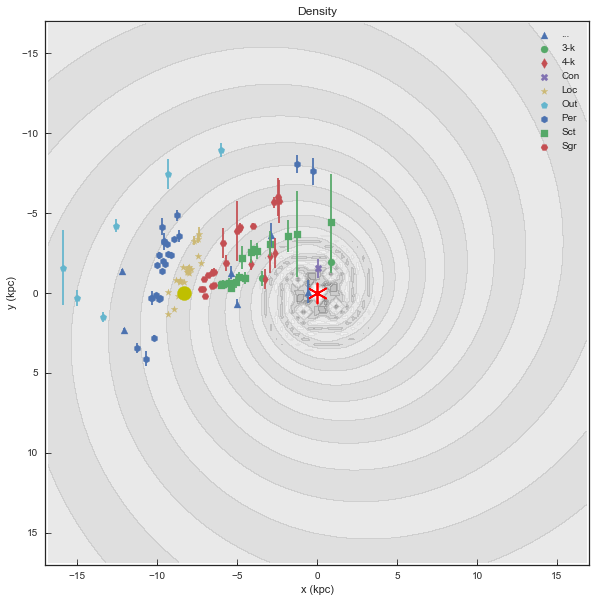

In [41]:
sp = SpiralArmsPotential(N=4, alpha=11.83*u.deg, phi_ref=19.51*u.deg, H=0.18*u.kpc)
plt_sp(sp)

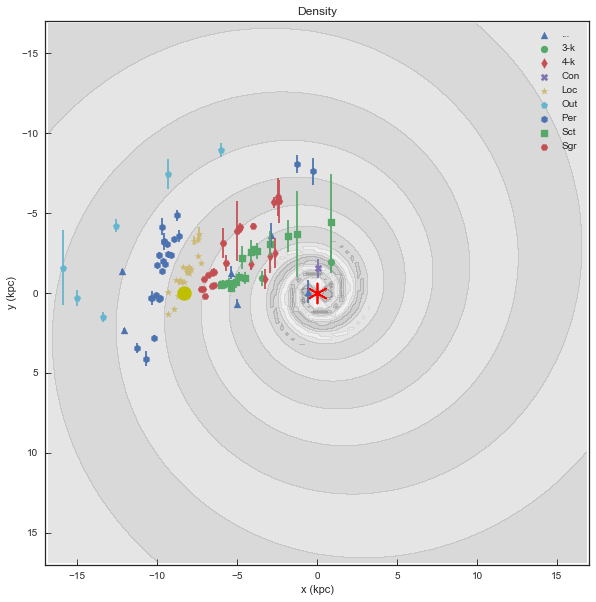

In [42]:
sp = SpiralArmsPotential(N=2, alpha=10*u.deg, phi_ref=13*u.deg, H=0.18*u.kpc)
plt_sp(sp)

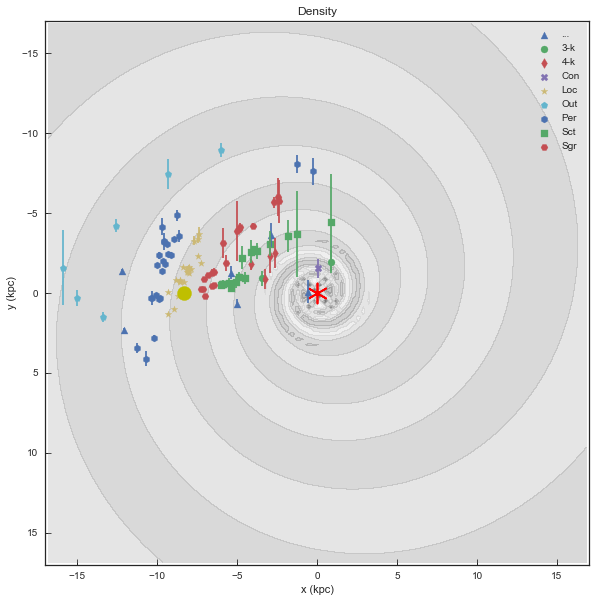

In [43]:
sp = SpiralArmsPotential(N=2, alpha=10.33287563*u.deg, phi_ref=0*u.deg, H=0.18*u.kpc)
plt_sp(sp)

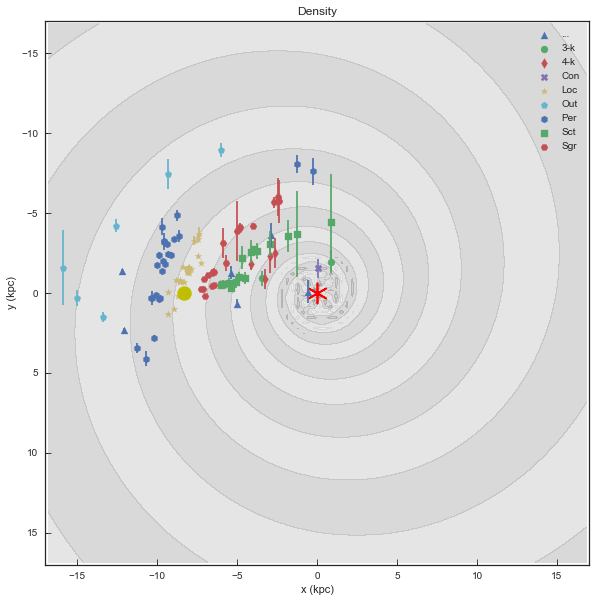

In [44]:
sp = SpiralArmsPotential(N=2, alpha=9.4*u.deg, phi_ref=14.2*u.deg, r_ref=9.9*u.kpc, H=0.18*u.kpc)
plt_sp(sp)

In [45]:
%who

Latitude	 Longitude	 MWPotential2014	 SkyCoord	 SpiralArmsPotential	 arm_ids	 ascii	 ax	 bovy_coords	 
coord	 evaluateDensities	 evaluatePotentials	 extent	 fig	 flat_listof_hmsfr	 glat	 glon	 goodness_of_fit	 
item	 k	 listof_dist_err	 listof_hmsfr	 local	 minimize	 np	 outer	 perseus	 
plotPotentials	 plt	 plt_hmsfr	 plt_hmsfr_and_spirals	 plt_sp	 plt_spirals	 pot	 sagittarius	 scutum	 
selector	 sp	 sublist	 tbl	 u	 x	 y	 
